In [ ]:
#General Linear Regression on Entire Data Set - Train-Test Split begins at In[41] 

In [ ]:
#import the required python libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [ ]:
#import boston data set

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [ ]:
#boston is an object, dictionary - explore 

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [ ]:
#see the desription of the data to know more detail

In [6]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [ ]:
#convert boston data set to a Pandas dataframe

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
#replace column head numbers, with feature names

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
boston.target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [ ]:
#add target values to the bos DataFrame

In [11]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
#fit a Linear Regression model to predict housing prices
#use Least Squares to estimate coefficients
#Y will be boston housing price - target data
#X will be all other variables

In [ ]:
#drop the Target variable from the X variables being regressed
#store the LinearRegression object as lm

In [12]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis=1)

lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
#remember, lm.fit() fits model - lm.predict() predicts Y w coefficients
#and lm.score() returns r-squared

In [14]:
lm.fit(X, bos.PRICE)
print('Estimated intercept coefficient:', lm.intercept_)
print('Number of coefficients:', len(lm.coef_))

Estimated intercept coefficient: 36.49110328036135
Number of coefficients: 13


In [22]:
pd.DataFrame(X.columns, lm.coef_)

,0
-0.107171,CRIM
0.046395,ZN
0.020860,INDUS
2.688561,CHAS
-17.795759,NOX
3.804752,RM
0.000751,AGE
-1.475759,DIS
0.305655,RAD
-0.012329,TAX


In [ ]:
#high correlation between RM and price - plot these two

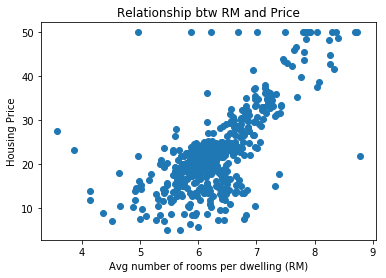

In [24]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Avg number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship btw RM and Price")
plt.show()

In [ ]:
#Calculate predicted prices and display 1st 5 housing prices

In [26]:
lm.predict(X)[:5]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

In [ ]:
#plot the True prices against the predicted prices

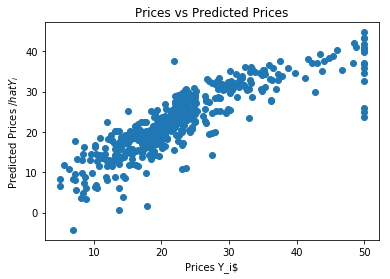

In [27]:
plt.scatter(bos.PRICE, lm.predict(X))
plt.xlabel("Prices Y_i$")
plt.ylabel("Predicted Prices $/hat{Y}_i$")
plt.title("Prices vs Predicted Prices")
plt.show()

In [ ]:
#notice some error in the prediction - Calculate the Mean Squared Error

In [29]:
mseFull = np.mean((bos.PRICE - lm.predict(X)) ** 2)
print(mseFull)

21.897779217687496


In [ ]:
#Check the MSE for the PTRATIO feature - 1 feature should produce high
#error - the MSE should increase

In [30]:
lm = LinearRegression()
lm.fit(X[['PTRATIO']], bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
msePTRATIO = np.mean((bos.PRICE - lm.predict(X[['PTRATIO']])) ** 2)
print(msePTRATIO)

62.65220001376927


In [ ]:
#a single feature is not a good predictor of housing prices

In [ ]:
#In PRACTICE YOU WON'T REGRESS THE ENTIRE Data Set
#Split DATA INTO TRAINING AND TEST Sets

In [ ]:
#Divide data sets Randomly - w train_test_split, which you need to import

In [41]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(
    X, bos.PRICE, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
#build a model using these train-test data sets

In [42]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [ ]:
#calculate MSE for training and test data

In [45]:
print("Fit a model X_train, and calculate MSE with Y_train:", 
      np.mean((Y_train - lm.predict(X_train)) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, Y_test:", 
      np.mean((Y_test - lm.predict(X_test)) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 19.546758473534684
Fit a model X_train, and calculate MSE with X_test, Y_test: 28.541367275618345


In [ ]:
#a Residual Plot is a good method to see errors - the data should  
#be Randomly scattered around the Line Zero - if you see structure,
#you should go back and check for unknown relationships btw variables

Text(0,0.5,'Residuals')

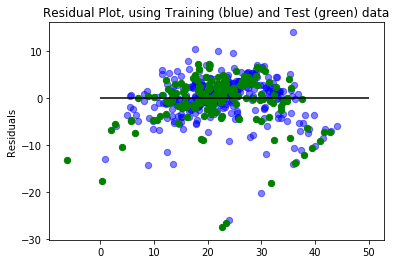

In [47]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y=0, xmin=0, xmax=50)
plt.title("Residual Plot, using Training (blue) and Test (green) data")
plt.ylabel("Residuals")

In [ ]:
#Notes from Manu Jeevan, How to run linear regression in python scikit learn